<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [78]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [3]:
# Checking the shape of one image
X_train[7].shape

# numpy array olduğundan shape methodunu çalıştırabiliyorum.28*28'lik renkli resimler var elimizde.

(28, 28)

In [4]:
X_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

In [5]:
y_train[7]

2

In [6]:
y_train.shape

(60000,)

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
np.unique(y_train, return_counts=True)

# train setinde de test setinde de bütün class'lar eşit dağılmış datamız dengeli.

NameError: ignored

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [9]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [10]:
y_train[0]

9

In [11]:
classes[y_train[0]]

'Ankle boot'

In [12]:
classes[int(y_train[0])]  # classes[9]

'Ankle boot'

In [13]:
plt.figure(figsize=(15, 15))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

NameError: ignored

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
X_train[8].min()

0

In [15]:
X_train[8].max()

255

In [16]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
X_train[8].min()

0.0

In [18]:
X_train[8].max()

1.0

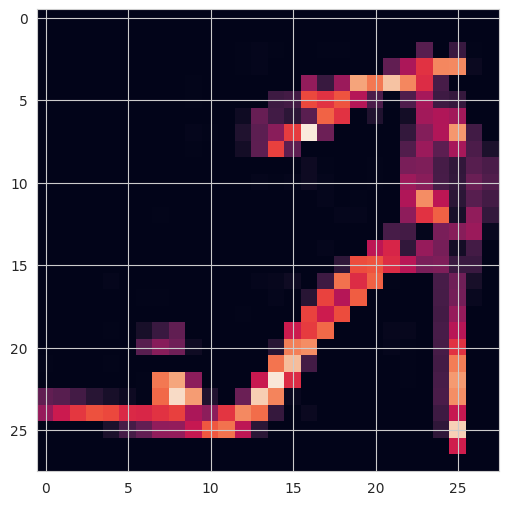

In [46]:
plt.imshow(X_train[8])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [28]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [21]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [25]:
y_train[0]

9

In [26]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [35]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 32)        8096      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min", patience=2, restore_best_weights = True)

In [39]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 19s 5ms/step - loss: 0.3903 - accuracy: 0.8580 - val_loss: 0.2884 - val_accuracy: 0.8942
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2470 - accuracy: 0.9092 - val_loss: 0.2712 - val_accuracy: 0.9069
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2086 - accuracy: 0.9240 - val_loss: 0.2517 - val_accuracy: 0.9167
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1819 - accuracy: 0.9343 - val_loss: 0.2440 - val_accuracy: 0.9136
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1647 - accuracy: 0.9425 - val_loss: 0.3382 - val_accuracy: 0.9105
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1515 - accuracy: 0.9469 - val_loss: 0.2371 - val_accuracy: 0.9196
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1407 - accuracy: 0.9507 - val_loss: 0.2609 - val_accuracy

In [40]:
X_train.shape

(60000, 28, 28, 1)

In [41]:
Y_train.shape

(60000, 10)

**TASK 7: Plot values of metrics you used in your model.**

In [42]:
model.metrics_names

['loss', 'accuracy']

In [47]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.390,0.858,0.288,0.894
1,0.247,0.909,0.271,0.907
2,0.209,0.924,0.252,0.917
3,0.182,0.934,0.244,0.914
4,0.165,0.942,0.338,0.910
5,0.152,0.947,0.237,0.920
6,0.141,0.951,0.261,0.923


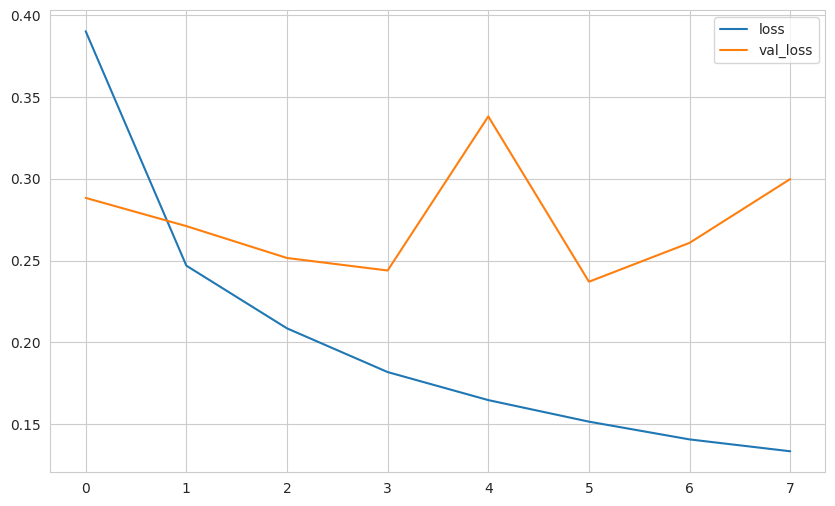

In [48]:
summary[["loss", "val_loss"]].plot();

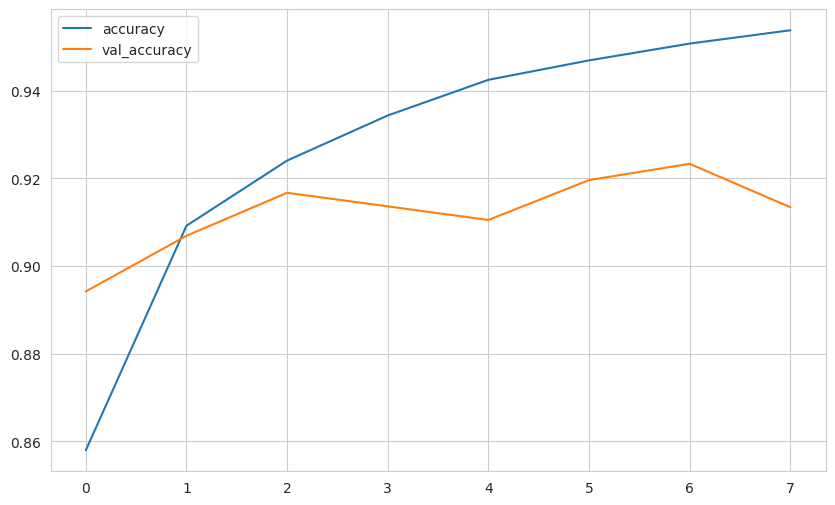

In [49]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2371 - accuracy: 0.9196


[0.2371395230293274, 0.9196000099182129]

In [52]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2371395230293274
Test accuracy: 0.9196000099182129


In [53]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[0.00000001, 0.00000001, 0.00000001, ..., 0.00003722, 0.        ,
        0.999951  ],
       [0.00000858, 0.        , 0.9999491 , ..., 0.        , 0.        ,
        0.        ],
       [0.00000002, 0.9999999 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00000221, 0.999964  , 0.0000001 , ..., 0.00000011, 0.00000002,
        0.00000013],
       [0.0000287 , 0.00000022, 0.00005251, ..., 0.00759852, 0.00006886,
        0.00047172]], dtype=float32)

In [54]:
y_pred = np.argmax(pred_prob, axis=1)

In [55]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.90      0.85      0.87      1000
           3       0.91      0.94      0.92      1000
           4       0.83      0.91      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.82      0.72      0.77      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [57]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [58]:
print(confusion_matrix(y_test, y_pred))

[[901   1  14  19   1   1  61   0   2   0]
 [  6 983   1   7   1   0   1   0   1   0]
 [ 23   0 850  13  67   0  47   0   0   0]
 [ 10   4   6 936  26   0  18   0   0   0]
 [  2   0  35  18 913   1  31   0   0   0]
 [  0   0   0   0   0 986   0  10   0   4]
 [116   0  39  31  87   0 722   0   5   0]
 [  0   0   0   0   0  12   0 978   0  10]
 [  6   0   0   8   5   3   4   3 971   0]
 [  0   0   1   0   0   4   0  39   0 956]]


<Axes: >

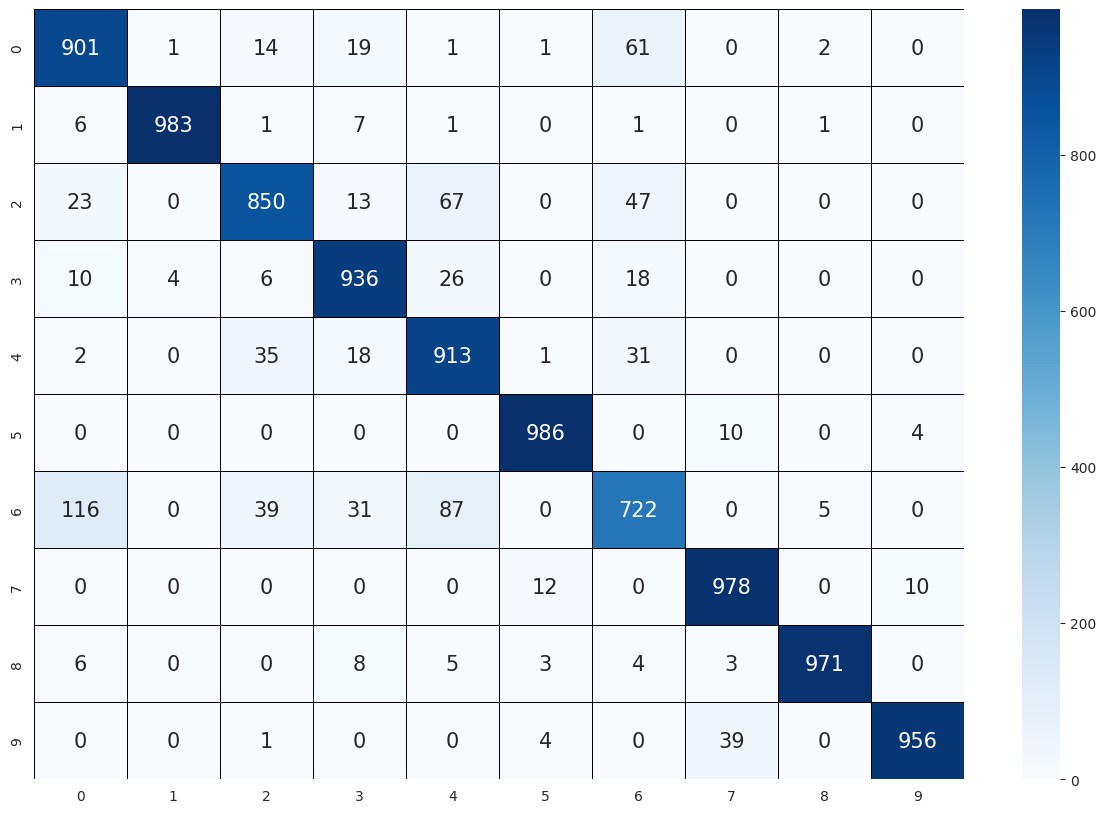

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

##Prediction

In [60]:
my_image = X_test[52]

In [61]:
my_image.shape

(28, 28, 1)

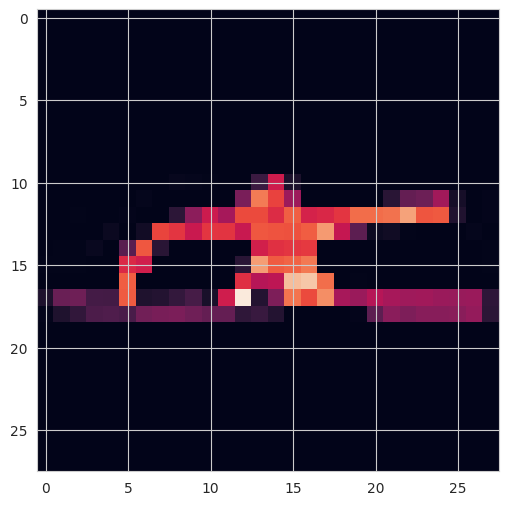

In [62]:
plt.imshow(my_image)

In [64]:
image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 244ms/step


In [65]:
image_prediction

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [66]:
np.argmax(image_prediction, axis=1)

array([5])

In [67]:
result=np.argmax(image_prediction, axis=1)

In [68]:
result

array([5])

In [69]:
classes[int(result)]

'Sandal'

In [74]:
y_test[52]

5

In [75]:
model.save("fashion.h5")

## Load the Saved Model and Get Predictions

In [79]:
model = tf.keras.models.load_model('fashion.h5')

In [80]:
X_test[217].shape

(28, 28, 1)

In [81]:
np.expand_dims(X_test[217],axis=0).shape

(1, 28, 28, 1)

In [82]:
pred=model.predict(np.expand_dims(X_test[217],axis=0))

1/1 [==============================] - 0s 121ms/step


In [83]:
np.argmax(pred)

6

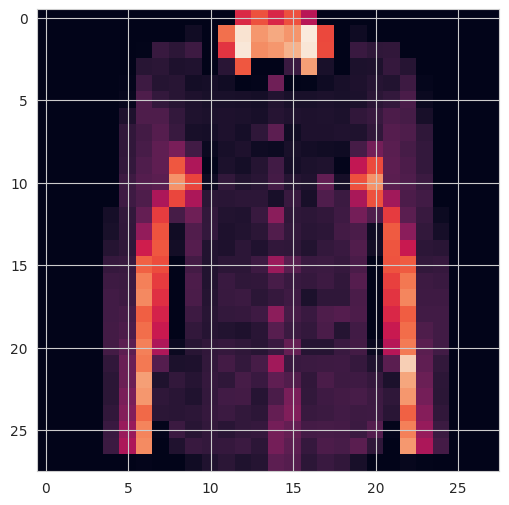

In [84]:
plt.imshow(X_test[217])

In [85]:
classes[6]

'Shirt'

In [86]:
y_test[217]

6

# End of Assignment